In [1]:
# !pip install -U scikit-learn

In [2]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\yukar\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# The Titanic dataset

Source: https://www.kaggle.com/c/titanic/data

Read the dataframe into a variable called titanic

In [3]:
# your code here
titanic = pd.read_csv('../data/titanic.csv')

# Drop the 'Cabin' for now. 

The problem with Cabin is it has a lot of missing values. We'll see how to handle it later.

In [4]:
# your code here
titanic.drop('Cabin', inplace=True, axis=1)

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Count the number of missing on the dataset

After counting the number of missings, drop the them. We'll come back at them later.

In [6]:
# your code here
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [7]:
titanic.dropna(inplace=True)

Check how much data we've dropped. And check the number of missings in the dataset again just to check if you droped it correctly.

In [8]:
# your code here
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Check some statistics of the dataset

Use `.describe()` on the resulting dataset to check some patterns on the numerical columns

In [9]:
# your code here
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


What can you conclude from that? Check for example the average of survivals, the minimum and maximum Ages.

In [10]:
# your code here
"""
A média de sobrevivência é de 40%, 
a idade mínima é de 5 meses e a idade
máxima é de 80 anos.

"""

'\nA média de sobrevivência é de 40%, \na idade mínima é de 5 meses e a idade\nmáxima é de 80 anos.\n\n'

# Visualizing relationships

Try to use a scatterplot on the dataframe columns 'Age' vs 'Survived' to see if you can have some insights

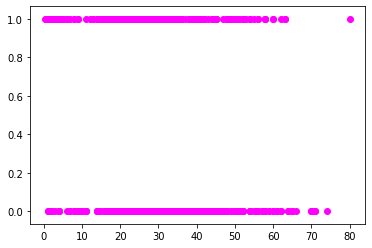

In [11]:
# your code here
plt.scatter(titanic['Age'], titanic['Survived'], c='magenta')
plt.show()

Now do the same for the columns 'Fare' and 'Survived'

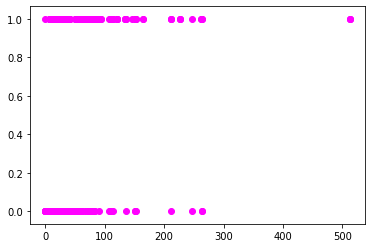

In [12]:
# your code here
plt.scatter(titanic['Fare'], titanic['Survived'], c='magenta')
plt.show()

# Is there any better visualization technique to handle binary data? If so, use it to try to understand the effect of Age in the variable Survived

# Is there any better visualization technique to handle binary data? If so, use it to try to understand the effect of Age in the variable Survived

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [14]:
# your code here
X = titanic[['Age']]
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_test)

C:\Users\yukar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


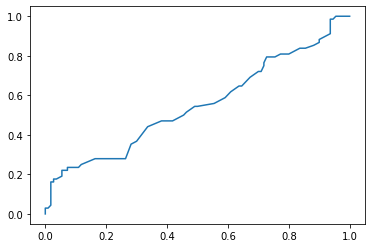

In [15]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.show()

# Cross Tab

Sometimes the plots above can reveal some important insights - specially if you have used some kind of, however, a better way to obtain these insights would be to use the `pd.crosstab()` 
function. Use it to explore the relations between `Age` and `Survived`. 

In [16]:
# your code here
pd.crosstab(titanic['Age'], titanic['Survived'])

Survived,0,1
Age,,
0.42,0,1
0.67,0,1
0.75,0,2
0.83,0,2
0.92,0,1
...,...,...
70.00,2,0
70.50,1,0
71.00,2,0


Now perform the same operation for `Pclass` and `Survived`

In [17]:
# your code here
pd.crosstab(titanic['Pclass'], titanic['Survived'])

Survived,0,1
Pclass,,
1,64,120
2,90,83
3,270,85


What can you infer from that?

In [18]:
# your code here
"""
Podemos dizer que a classe 1 possui maior
probabilidade em sobreviver em relação
as demais classes.
"""

'\nPodemos dizer que a classe 1 possui maior\nprobabilidade em sobreviver em relação\nas demais classes.\n'

# Correlations

Can you infer the same using a correlation table and a heatmap?

1. Correlation dataframe


In [19]:
# your code here
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.029526,-0.035609,0.033681,-0.082704,-0.011672,0.009655
Survived,0.029526,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.035609,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,0.033681,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.082704,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,-0.011672,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.009655,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


2. Correlation Heatmap

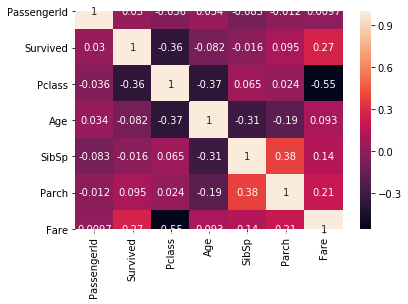

In [20]:
# your code here
sns.heatmap(titanic.corr(), xticklabels=titanic.corr().columns, yticklabels=titanic.corr().columns, annot=True)

Do you think age is linearly related to the variable Survived? Do you think this variable will be important in our models?

In [21]:
# your code here
"""
Como o índice de correlação entre idade e 
sobreviventes é de -0.082, podemos dizer 
que as variáveis não estão ligadas de forma 
direta.
"""

'\nComo o índice de correlação entre idade e \nsobreviventes é de -0.082, podemos dizer \nque as variáveis não estão ligadas de forma \ndireta.\n'

# Plot the distribution of the Age variable for each category of the `Survived` variable in the same plot. 

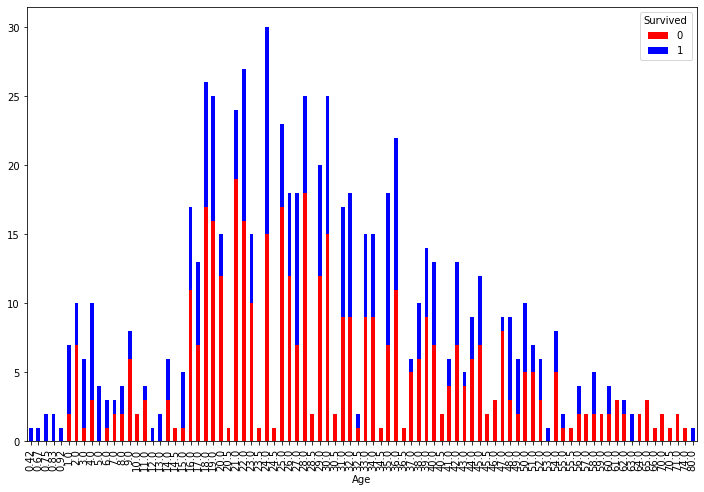

In [22]:
# your code here
c = pd.crosstab(titanic['Age'], titanic['Survived'])
c.plot(kind='bar', stacked=True, color=['red','blue'], grid=False,figsize=(12, 8))
plt.show()

# Now try to plot the same distribution but break the group into 
1. Survived, less than 18 years old male 
2. NOT Survived, less than 18 years old male 

And plot their `Age` distributions in the same graph.

# Now try to plot the same distribution but break the group into 
1. Survived, less than 18 years old male 
2. NOT Survived, less than 18 years old male 

And plot their `Age` distributions in the same graph.

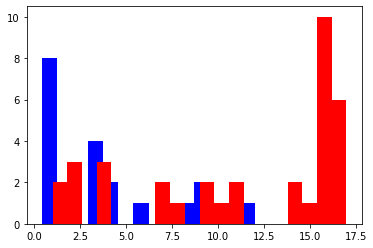

In [23]:
# your code here
mask1 = (titanic['Survived'] == 1) & (titanic['Age'] < 18) & (titanic['Sex'] == 'male')
mask2 = (titanic['Survived'] == 0) & (titanic['Age'] < 18) & (titanic['Sex'] == 'male')
titanic1 = titanic[mask1]
titanic2 = titanic[mask2]
plt.hist(titanic1['Age'], color='blue', bins=20)
plt.hist(titanic2['Age'], color='red', bins=20)
plt.show()

Do you understand this graph? What can you conclude about the variable Age? Is it important now? How does this relate to `Age`'s linear correlation coefficient? 

In [24]:
# your code here
"""
O gráfico mostra que quanto mais novo, 
maior será a quantidade de sobreviventes
do gênero masculino de até 18 anos.

"""

'\nO gráfico mostra que quanto mais novo, \nmaior será a quantidade de sobreviventes\ndo gênero masculino de até 18 anos.\n\n'

# For these groups above, calculate their average of survivalness.

You probably observed a discrimination of Surivavalness around 9 years old. For this exercise, you need to calculate the average of survivalness for each of these groups to survive. Again, filter the dataset into two subgroups:

1. Males with ages less than 9
2. Males with ages greater than 9 and less than 18

What are their average survival?

# For these groups above, calculate their average of survivalness.

You probably observed a discrimination of Surivavalness around 9 years old. For this exercise, you need to calculate the average of survivalness for each of these groups to survive. Again, filter the dataset into two subgroups:

1. Males with ages less than 9
2. Males with ages greater than 9 and less than 18

What are their average survival?

In [25]:
# your code here
mask1 = (titanic['Age'] <= 9) & (titanic['Sex'] == 'male')
mask2 = (9 < titanic['Age']) & (titanic['Age'] < 18) & (titanic['Sex'] == 'male')
titanic1 = titanic[mask1]['Survived'].mean()
titanic2 = titanic[mask2]['Survived'].mean()
print('Males with ages less than 9 years', titanic1)
print('Males with ages greater than 9 and less than 18',titanic2)

Males with ages less than 9 years 0.59375
Males with ages greater than 9 and less than 18 0.15384615384615385


*To think:* If you were told then, to predict if a 15 year old man have survived, what would you predict?

In [26]:
"""
Provavelmente responderia que ele iria morrer.
"""

'\nProvavelmente responderia que ele iria morrer.\n'

# Prepare data for our first model

### Let's start simple. 

First create a variable named `X` containing the variables `['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']`. 


In [27]:
X = titanic[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

Also create a pandas series containing the variable Survived. Store it in the variable `y`.

In [28]:
y = titanic['Survived']

# Dummify your dataset

Create a dummy version of your `X` dataset. After obtaining the dummification of your features, you'll observe that some  You won't need both of them, so you could use the argument `drop_first=True` to get rid of the first dummy.

In [29]:
X = pd.get_dummies(X, drop_first=True)
X

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
885,3,39.0,0,5,29.1250,0,1,0
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


# Prepare your validation strategy

We'll use the validation strategy called `holdout`. For this strategy, the idea is to hide part of your dataframe to estimate the error on a data you haven't seen before. 

So you'll be able to use part of your dataset to train your model and then use the never-seen part of your dataset to have a good estimate of the error when the model goes to production.

## Separate your `X` dataset into a dataset called `X_train` and another called `X_test`. Of course, also create a pandas series containing `y_train` and `y_test`. 

## Separate your `X` dataset into a dataset called `X_train` and another called `X_test`. Of course, also create a pandas series containing `y_train` and `y_test`. 

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

# You'll be able to concat the `X_train` and `y_train`. Do the same for `X_test` and `y_test`. Put them into dataframes called `titanic_train` and `titanic_test`

# You'll be able to concat the `X_train` and `y_train`. Do the same for `X_test` and `y_test`. Put them into dataframes called `titanic_train` and `titanic_test`

In [41]:
X_train['y_train'] = y_train
X_test['y_test'] = y_test
titanic_train = X_train
titanic_test = X_test

C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# And store it on your own folder.

In [44]:
titanic_train.to_csv('titanic_train.csv', index=False)
titanic_test.to_csv('titanic_test.csv', index=False)